Модель прогнозирует изменение цен на акции (по умолчанию American Airlines).
Датасет взят с https://www.kaggle.com/camnugent/sandp500

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
company='AAL'

Считываем данные

In [3]:
data = pd.read_csv('stocks.csv')
cl = data[data['Name']==company].close

Рескейл в (0, 1)

In [4]:
scl = MinMaxScaler()
#Scale the data
cl = cl.values.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)

Функция для создания кусков данных по 7 дней

In [5]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1000
251
1000
251


Используем LSTM для "запоминания" предыдущих значений

In [6]:
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [7]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))

Обучение

In [8]:
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 1000 samples, validate on 251 samples
Epoch 1/300
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0036 - val_loss: 0.0029
Epoch 2/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 3/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 4/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 6/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/300
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 10/300
1000/1000 [==

1000/1000 [==============================] - 2s 2ms/step - loss: 4.6018e-04 - val_loss: 4.3805e-04
Epoch 76/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.6113e-04 - val_loss: 4.4023e-04
Epoch 77/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.5792e-04 - val_loss: 4.4071e-04
Epoch 78/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.5092e-04 - val_loss: 4.3807e-04
Epoch 79/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.4527e-04 - val_loss: 4.3469e-04
Epoch 80/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.3930e-04 - val_loss: 4.3078e-04
Epoch 81/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.3615e-04 - val_loss: 4.2862e-04
Epoch 82/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.3341e-04 - val_loss: 4.2601e-04
Epoch 83/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.3071e-04 - val_loss: 4.2478e-04
Epoch

Epoch 148/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.1667e-04 - val_loss: 4.1094e-04
Epoch 149/300
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9341e-04 - val_loss: 4.1902e-04
Epoch 150/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.2324e-04 - val_loss: 4.0890e-04
Epoch 151/300
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9807e-04 - val_loss: 4.2404e-04
Epoch 152/300
1000/1000 [==============================] - 3s 3ms/step - loss: 4.3661e-04 - val_loss: 4.1127e-04
Epoch 153/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0794e-04 - val_loss: 4.1979e-04
Epoch 154/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.2302e-04 - val_loss: 4.1799e-04
Epoch 155/300
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9539e-04 - val_loss: 4.2692e-04
Epoch 156/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.3151e-04 - val_

1000/1000 [==============================] - 2s 2ms/step - loss: 3.9652e-04 - val_loss: 4.5623e-04
Epoch 221/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0367e-04 - val_loss: 4.5926e-04
Epoch 222/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0112e-04 - val_loss: 4.5749e-04
Epoch 223/300
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9582e-04 - val_loss: 4.5065e-04
Epoch 224/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0178e-04 - val_loss: 4.4922e-04
Epoch 225/300
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9552e-04 - val_loss: 4.4957e-04
Epoch 226/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0288e-04 - val_loss: 4.5655e-04
Epoch 227/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0226e-04 - val_loss: 4.5392e-04
Epoch 228/300
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9799e-04 - val_loss: 4.5434e-

1000/1000 [==============================] - 2s 2ms/step - loss: 4.0019e-04 - val_loss: 3.8063e-04
Epoch 293/300
1000/1000 [==============================] - 2s 2ms/step - loss: 3.9725e-04 - val_loss: 3.8490e-04
Epoch 294/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0289e-04 - val_loss: 3.8115e-04
Epoch 295/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0296e-04 - val_loss: 3.8645e-04
Epoch 296/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.0803e-04 - val_loss: 3.8299e-04
Epoch 297/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.1183e-04 - val_loss: 3.8823e-04
Epoch 298/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.1300e-04 - val_loss: 3.8382e-04
Epoch 299/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.2011e-04 - val_loss: 3.8890e-04
Epoch 300/300
1000/1000 [==============================] - 2s 2ms/step - loss: 4.1620e-04 - val_loss: 3.8500e-

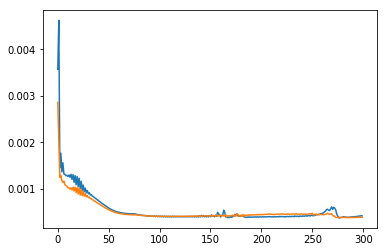

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Генерируем предсказания на 250 итераций

In [10]:
act = []
pred = []
for i in range(250):
    Xt = model.predict(X_test[i].reshape(1,7,1))
    print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
    pred.append(scl.inverse_transform(Xt))
    act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[45.34949]], actual:[[45.06]]
predicted:[[45.18065]], actual:[[46.3]]
predicted:[[46.57469]], actual:[[46.45]]
predicted:[[46.63046]], actual:[[47.41]]
predicted:[[47.589355]], actual:[[46.57]]
predicted:[[46.619656]], actual:[[47.54]]
predicted:[[47.67851]], actual:[[46.97]]
predicted:[[47.042065]], actual:[[46.91]]
predicted:[[46.934673]], actual:[[46.81]]
predicted:[[46.894276]], actual:[[46.32]]
predicted:[[46.352055]], actual:[[46.1]]
predicted:[[46.154675]], actual:[[46.28]]
predicted:[[46.402306]], actual:[[46.32]]
predicted:[[46.43302]], actual:[[46.36]]
predicted:[[46.46396]], actual:[[47.09]]
predicted:[[47.266033]], actual:[[45.72]]
predicted:[[45.70544]], actual:[[46.82]]
predicted:[[46.96828]], actual:[[45.31]]
predicted:[[45.3348]], actual:[[44.84]]
predicted:[[44.833294]], actual:[[44.89]]
predicted:[[45.055973]], actual:[[43.33]]
predicted:[[43.344296]], actual:[[43.9]]
predicted:[[44.069386]], actual:[[42.37]]
predicted:[[42.484306]], actual:[[41.21]]
predic

predicted:[[48.426785]], actual:[[49.22]]
predicted:[[49.308464]], actual:[[49.25]]
predicted:[[49.273006]], actual:[[50.49]]
predicted:[[50.583126]], actual:[[49.]]
predicted:[[48.848164]], actual:[[49.93]]
predicted:[[49.915134]], actual:[[49.47]]
predicted:[[49.446014]], actual:[[49.61]]
predicted:[[49.537678]], actual:[[50.88]]
predicted:[[50.982464]], actual:[[51.02]]
predicted:[[50.99542]], actual:[[51.3]]
predicted:[[51.202892]], actual:[[50.47]]
predicted:[[50.28535]], actual:[[50.09]]
predicted:[[49.916733]], actual:[[50.21]]
predicted:[[50.139034]], actual:[[51.06]]
predicted:[[51.07352]], actual:[[51.49]]
predicted:[[51.450584]], actual:[[51.44]]
predicted:[[51.301594]], actual:[[51.92]]
predicted:[[51.817593]], actual:[[52.79]]
predicted:[[52.70944]], actual:[[52.59]]
predicted:[[52.321323]], actual:[[52.85]]
predicted:[[52.59514]], actual:[[52.4]]
predicted:[[52.10468]], actual:[[52.46]]
predicted:[[52.199577]], actual:[[52.03]]
predicted:[[51.76457]], actual:[[52.99]]
pre

In [11]:
result_df = pd.DataFrame({'pred':list(np.reshape(pred, (-1))),'act':list(np.reshape(act, (-1)))})

Отклонение от настоящих данных

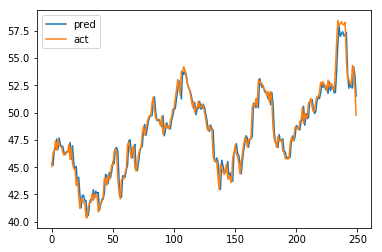

In [12]:
result_df.plot(kind='line')